Notebooks 1-8 have explore the K Nearest Neirbough algorithm in its fullest. It has been throughly tested using different parameters to optimise the model for reccomendations. However, other models for reccomdations exists and to create the best predictor these msut be explored. This notebook aims to introduce the SVD alogirthm provided by the surprise libary, an by using the built in grid search method, the algorithm will be tested to the fullest extent to find our optimal tuning. Again, testing will occur on the smaller 100k dataset due to computional power but the final model will be compared on performance on both the 100k and 1m

In [1]:
import pandas as pd
import numpy as np
import random
from surprise import Dataset
import matplotlib.pyplot as plt

'''After much brute force and various failed runs on my laptop. I decided to tranfer the grid search code to seperate py files to be ran on my pc with 8cores. The process was painstaking slow and that was with the limited number of params configurations i chose. If i was to have my own way, I would have liked to perform a wider grid or random grid solutions. However this waas simply not possible. The matrix factorision algorithm grid search and csv of the setups can be found in the respective folder. I do not reccomend running the scripts unless you want your pc to thermal throttle and your energy bill to sky rocket'''

'After much brute force and various failed runs on my laptop. I decided to tranfer the grid search code to seperate py files to be ran on my pc with 8cores. The process was painstaking slow and that was with the limited number of params configurations i chose. If i was to have my own way, I would have liked to perform a wider grid or random grid solutions. However this waas simply not possible. The matrix factorision algorithm grid search and csv of the setups can be found in the respective folder. I do not reccomend running the scripts unless you want your pc to thermal throttle and your energy bill to sky rocket'

The rest of this notebook will load the parameter setup for each respective algorithm. Train and test on the ml-100 and 1m and the provide visualtions to compare the findings

In [2]:
# start by loading the setup for SVD
svd_setup= pd.read_csv('./gridSearch/SVD_rmse_best.csv')
svd_setup

,n_factors,lr_all,reg_all,n_epochs
0,250,0.01,0.1,50


In [3]:
svd_n_factors=svd_setup['n_factors'][0]
svd_lr_all= svd_setup['lr_all'][0]
svd_reg_all= svd_setup['reg_all'][0]
svd_n_epochs=svd_setup['n_epochs'][0]

In [4]:
#split into validate and test sets

data100k = Dataset.load_builtin('ml-100k')
raw_ratings= data100k.raw_ratings

random.seed(2001)
np.random.seed(2001)
random.shuffle(raw_ratings)

# create threshold for unseen, 80-20
cutoff = int(0.8 * len(raw_ratings))
A_raw= raw_ratings[:cutoff]
B_raw= raw_ratings[cutoff:]

# data is now only set A ratings
data100k.raw_ratings= A_raw

In [5]:
#SVD algorithm- the quickest of the bunch on 100k unseen data
from surprise.accuracy import rmse
import time
from surprise import SVD

algo= SVD(n_factors=svd_n_factors, lr_all=svd_lr_all, reg_all=svd_reg_all, n_epochs=svd_n_epochs, random_state=1)
trainset = data100k.build_full_trainset()
start_fit = time.time()
algo.fit(trainset)
svd_fit_100k= time.time()-start_fit
testset = data100k.construct_testset(B_raw)  # testset is now the set B
start_predict= time.time()
predictions_100k = algo.test(testset)
svd_test_100k= time.time()-start_predict
print("Unbiased accuracy on 100k=,", end=" ")
svd_rmse_100k= rmse(predictions_100k)
print("Fit time for 100k = "+ str(svd_fit_100k))
print("Test time for 100k ="+ str(svd_test_100k))

svd_100k_stats=np.array([svd_rmse_100k, svd_fit_100k, svd_test_100k])

Unbiased accuracy on 100k=, RMSE: 0.9106
Fit time for 100k = 6.306532621383667
Test time for 100k =0.15000247955322266


In [6]:
#load the setup for SVDpp
svdpp_setup= pd.read_csv('./gridSearch/SVDpp_rmse_best.csv')
svdpp_setup

,n_factors,lr_all,reg_all,n_epochs
0,100,0.005,0.1,70


In [7]:
svdpp_n_factors=svd_setup['n_factors'][0]
svdpp_lr_all= svd_setup['lr_all'][0]
svdpp_reg_all= svd_setup['reg_all'][0]
svdpp_n_epochs=svd_setup['n_epochs'][0]

In [8]:
from surprise import SVDpp

algo= SVDpp(n_factors=svdpp_n_factors, lr_all=svdpp_lr_all, reg_all=svdpp_reg_all, n_epochs=svdpp_n_epochs, random_state=1)
trainset = data100k.build_full_trainset()
start_fit = time.time()
algo.fit(trainset)
svdpp_fit_100k= time.time()-start_fit
testset = data100k.construct_testset(B_raw)  # testset is now the set 3356
start_predict= time.time()
predictions_100k = algo.test(testset)
svdpp_test_100k= time.time()-start_predict
print("Unbiased accuracy on 100k=,", end=" ")
svdpp_rmse_100k= rmse(predictions_100k)
print("Fit time for 100k = "+ str(svdpp_fit_100k))
print("Test time for 100k ="+ str(svdpp_test_100k))

svdpp_100k_stats=np.array([svdpp_rmse_100k, svdpp_fit_100k, svdpp_test_100k])

Unbiased accuracy on 100k=, RMSE: 0.9102
Fit time for 100k = 524.2002038955688
Test time for 100k =4.890001058578491


In [9]:
nmf_setup= pd.read_csv('./gridSearch/nmf_rmse_best.csv')
nmf_setup

,n_factors,lr_bu,lr_bi,reg_bu,reg_bi,n_epochs,biased
0,20,0.02,0.02,0.05,0.2,70,True


In [10]:
from surprise import NMF

# extract hyperparameters
nmf_n_factors =nmf_setup['n_factors'].iloc[0]
nmf_lr_bu =nmf_setup['lr_bu'].iloc[0]
nmf_lr_bi =nmf_setup['lr_bi'].iloc[0]
nmf_reg_bu =nmf_setup['reg_bu'].iloc[0]
nmf_reg_bi =nmf_setup['reg_bi'].iloc[0]
nmf_n_epochs =nmf_setup['n_epochs'].iloc[0]
nmf_biased =nmf_setup['biased'].iloc[0]


In [11]:
# create NMF algorithm instance with extracted hyperparameters
algo= NMF(n_factors=nmf_n_factors,
                     lr_bu=nmf_lr_bu,
                     lr_bi=nmf_lr_bi,
                     reg_bu=nmf_reg_bu,
                     reg_bi=nmf_reg_bi,
                     n_epochs=nmf_n_epochs,
                     biased=nmf_biased, random_state=1)


trainset = data100k.build_full_trainset()
start_fit = time.time()
algo.fit(trainset)
nmfb_fit_100k= time.time()-start_fit
testset = data100k.construct_testset(B_raw)  # testset is now the set 3356
start_predict= time.time()
predictions_100k = algo.test(testset)
nmfb_test_100k= time.time()-start_predict
print("Unbiased accuracy on 100k=,", end=" ")
nmfb_rmse_100k= rmse(predictions_100k)
print("Fit time for 100k = "+ str(nmfb_fit_100k))
print("Test time for 100k ="+ str(nmfb_test_100k))

nmfb_100k_stats=np.array([nmfb_rmse_100k, nmfb_fit_100k, nmfb_test_100k])

Unbiased accuracy on 100k=, RMSE: 1.4630
Fit time for 100k = 2.462994337081909
Test time for 100k =0.14700055122375488


The results for this are unexpected and far from the grid search score. The next cell is going to reuse the nmf algorithm but with biased=False

In [12]:
# create NMF algorithm instance with extracted hyperparameters
algo= NMF(n_factors=nmf_n_factors,
                     lr_bu=nmf_lr_bu,
                     lr_bi=nmf_lr_bi,
                     reg_bu=nmf_reg_bu,
                     reg_bi=nmf_reg_bi,
                     n_epochs=nmf_n_epochs,
                     biased=False, random_state=1)


trainset = data100k.build_full_trainset()
start_fit = time.time()
algo.fit(trainset)
nmf_fit_100k= time.time()-start_fit
testset = data100k.construct_testset(B_raw)  # testset is now the set 3356
start_predict= time.time()
predictions_100k = algo.test(testset)
nmf_test_100k= time.time()-start_predict
print("Unbiased accuracy on 100k=,", end=" ")
nmf_rmse_100k= rmse(predictions_100k)
print("Fit time for 100k = "+ str(nmf_fit_100k))
print("Test time for 100k ="+ str(nmf_test_100k))

nmf_100k_stats=np.array([nmf_rmse_100k, nmf_fit_100k, nmf_test_100k])

Unbiased accuracy on 100k=, RMSE: 0.9573
Fit time for 100k = 2.2959911823272705
Test time for 100k =0.18804430961608887


Interesting results. Possibly further research into parameter tuning required now ?

In [36]:
#create a data frame for all the data to store and plot later

data=pd.DataFrame(columns=['RMSE', 'Fit Time', 'Predict Time'])
data.loc[len(data)] = svd_100k_stats
data.loc[len(data)] = svdpp_100k_stats
data.loc[len(data)] = nmfb_100k_stats
data.loc[len(data)] = nmf_100k_stats
data.insert(0,'Algorithm', ['SVD', 'SVDpp', 'NMF(bias)', 'NMF(unbias)'])
data.to_csv('./algo_data/matrix_factor_100k', index=False)


In [18]:

rmse_values=np.array([svd_100k_stats[0], svdpp_100k_stats[0], nmf_100k_stats[0], nmfb_100k_stats[0]])
print(rmse_values)



[0.91064402 0.91022162 0.95732459 1.46296499]


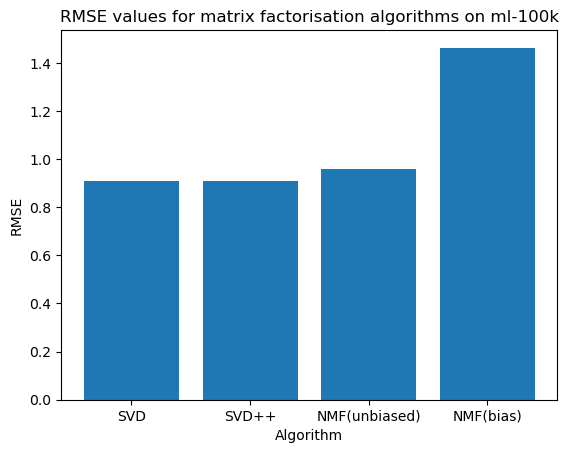

In [35]:

x_labels = ['SVD', 'SVD++', 'NMF(unbiased)', 'NMF(bias)']

plt.bar(range(len(rmse_values)), rmse_values)

plt.xticks(range(len(x_labels)), x_labels)

plt.title('RMSE values for matrix factorisation algorithms on ml-100k')
plt.xlabel('Algorithm')
plt.ylabel('RMSE')

plt.savefig('./Matrix Graphs/rmse_100k.png')
plt.show()


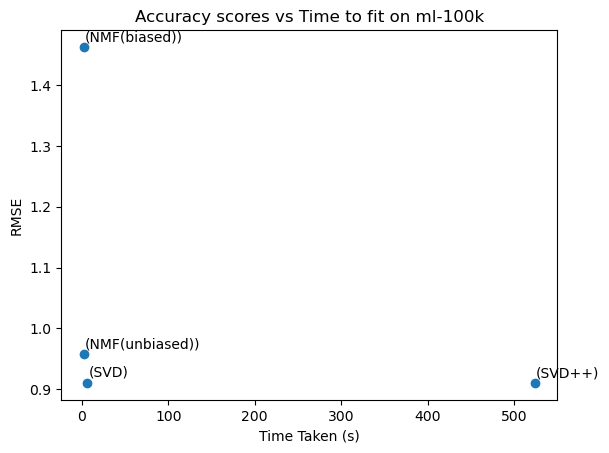

In [38]:


fit_times=np.array([svd_100k_stats[1], svdpp_100k_stats[1], nmf_100k_stats[1], nmfb_100k_stats[1]])
algos=np.array(['SVD', 'SVD++', 'NMF(unbiased)', 'NMF(biased)'])

plt.scatter(fit_times, rmse_values)


for i in range(len(fit_times)):
    plt.text(fit_times[i]+1, rmse_values[i]+0.01, f"({algos[i]})")


plt.title('Accuracy scores vs Time to fit on ml-100k')
plt.xlabel('Time Taken (s)')
plt.ylabel('RMSE')

plt.savefig('./Matrix Graphs/Accuracy vs time to fit on ml100k')
plt.show()

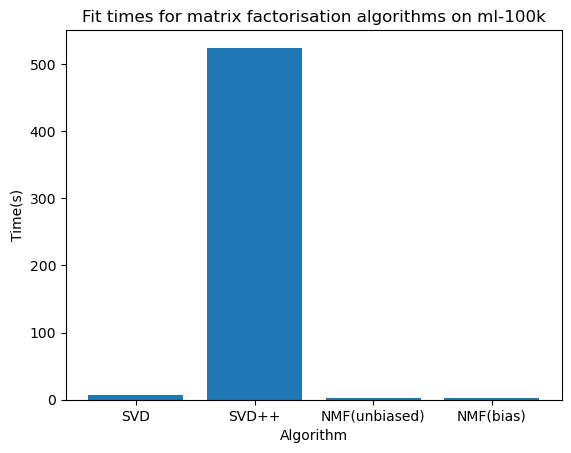

In [40]:

x_labels = ['SVD', 'SVD++', 'NMF(unbiased)', 'NMF(bias)']

plt.bar(range(len(fit_times)), fit_times)

plt.xticks(range(len(x_labels)), x_labels)

plt.title('Fit times for matrix factorisation algorithms on ml-100k')
plt.xlabel('Algorithm')
plt.ylabel('Time(s)')

plt.savefig('./Matrix Graphs/fit_100k.png')
plt.show()
